In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV_FILE = "P01-10-S054-U-R.csv"


In [40]:
def plot_gaze_heatmap(df):
    # Ensure X and Y are numeric
    df["X"] = pd.to_numeric(df["X"], errors="coerce")
    df["Y"] = pd.to_numeric(df["Y"], errors="coerce")
    # Drop rows with invalid coordinates
    df = df.dropna(subset=["X", "Y"])
    # Rozdělení podle typu události
    saccade_df = df[df["Event"] == "saccade"]
    fixation_df = df[df["Event"] == "fixation"]

    # Společný rozsah os
    x_min = 0  # vynucený začátek na 0
    x_max = 1280
    y_min = 0
    y_max = 1024

    # Vytvoření grafu
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    for ax in axes:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_max, y_min)  # Osa Y obráceně (0,0 vlevo nahoře)
        ax.set_aspect("equal")  # Stejné měřítko

    # Heatmapa Saccade
    sns.kdeplot(x=saccade_df["X"], y=saccade_df["Y"], cmap="Reds", fill=True, ax=axes[0])
    axes[0].set_title("Heatmap of Saccade Events")

    # Heatmapa Fixation
    sns.kdeplot(x=fixation_df["X"], y=fixation_df["Y"], cmap="Blues", fill=True, ax=axes[1])
    axes[1].set_title("Heatmap of Fixation Events")

    # Kombinovaná heatmapa
    sns.kdeplot(x=saccade_df["X"], y=saccade_df["Y"], cmap="Reds", fill=True, alpha=0.5, ax=axes[2], label="Saccade")
    sns.kdeplot(
        x=fixation_df["X"], y=fixation_df["Y"], cmap="Blues", fill=True, alpha=0.5, ax=axes[2], label="Fixation"
    )
    axes[2].set_title("Combined Heatmap of Events")
    axes[2].legend()

    plt.tight_layout()
    plt.show()


     Read     
--------------------------------------------------
       TimeStamp      X      Y    Event
0  12:30:06.9216  554.1  557.7  saccade
1  12:30:6.92209  553.6  557.9  saccade
2  12:30:6.92259  554.4  557.8  saccade
3  12:30:6.92308  555.5  557.3  saccade
4  12:30:6.92357  556.4  557.1  saccade


/var/folders/p7/7fx272ls7kg3097q8mnwp__80000gn/T/ipykernel_23244/3961197940.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


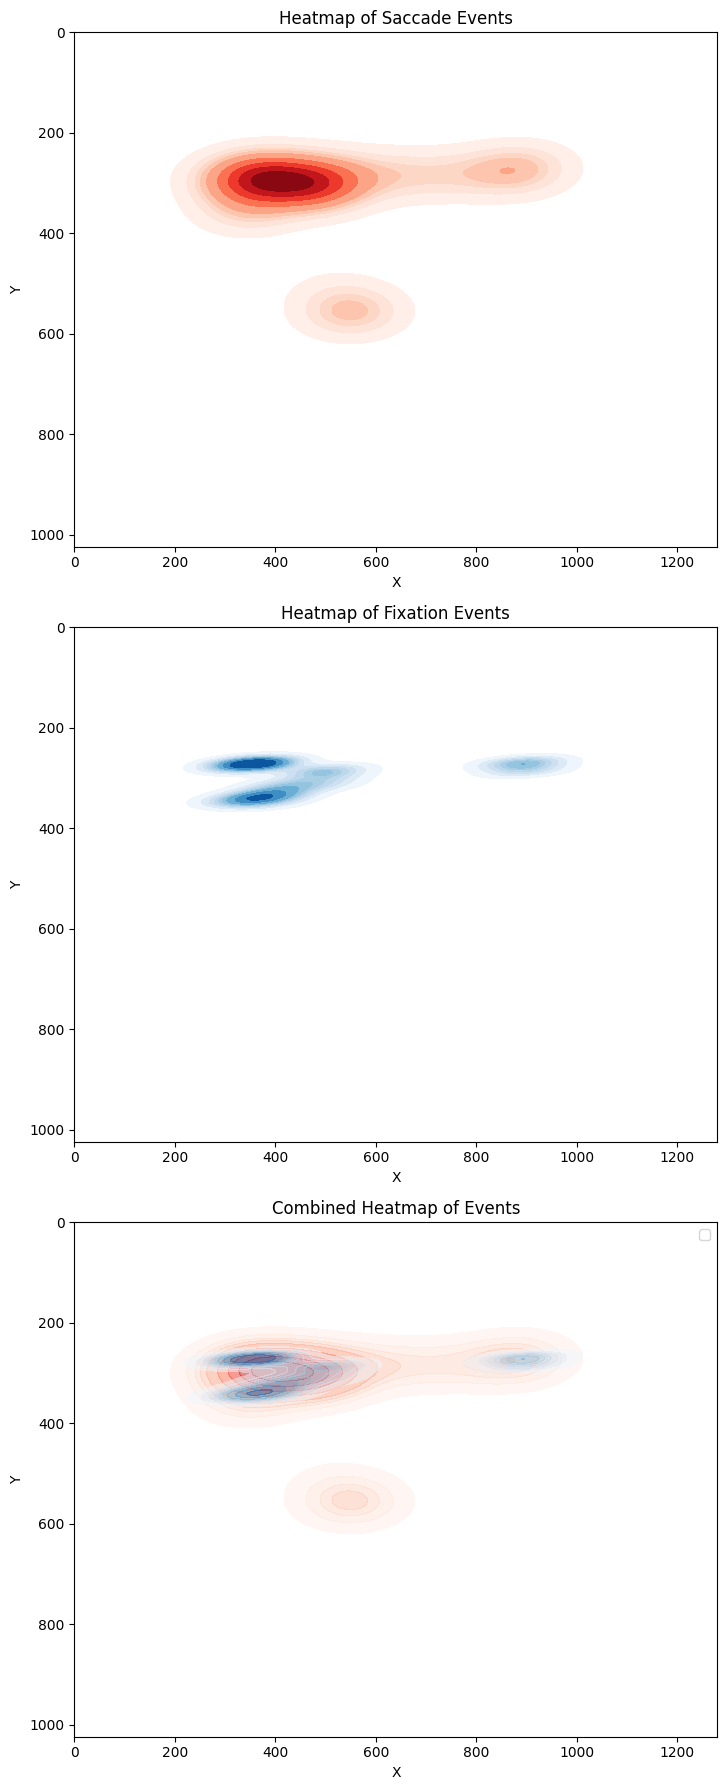

--------------------------------------------------
     See     
--------------------------------------------------
       TimeStamp      X      Y    Event
0  12:30:16.1370  698.6  390.8  saccade
1  12:30:16.1375  694.4  397.7  saccade
2  12:30:16.1379  689.7  404.7  saccade
3  12:30:16.1383  682.0  418.5  saccade
4  12:30:16.1388  676.0  428.7  saccade


/var/folders/p7/7fx272ls7kg3097q8mnwp__80000gn/T/ipykernel_23244/3961197940.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


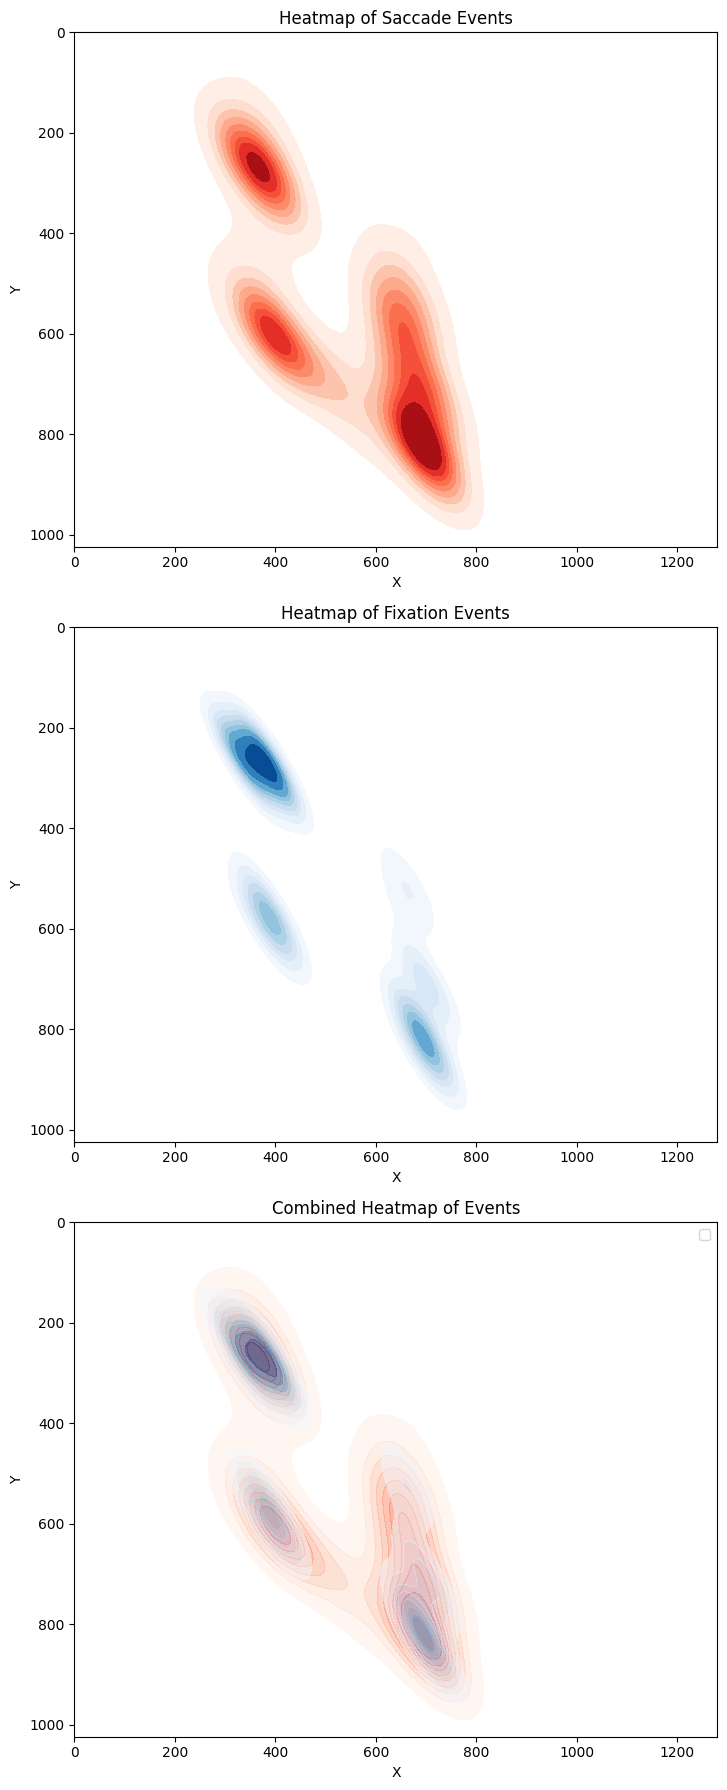

--------------------------------------------------
     Translate     
--------------------------------------------------
       TimeStamp      X      Y     Event
0  12:30:10.7110  349.7  273.6  fixation
1  12:30:10.7115  349.6  275.7  fixation
2   12:30:10.712  349.6  278.2  fixation
3  12:30:10.7125  349.7  280.5  fixation
4  12:30:10.7130  350.2  280.8  fixation


/var/folders/p7/7fx272ls7kg3097q8mnwp__80000gn/T/ipykernel_23244/3961197940.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


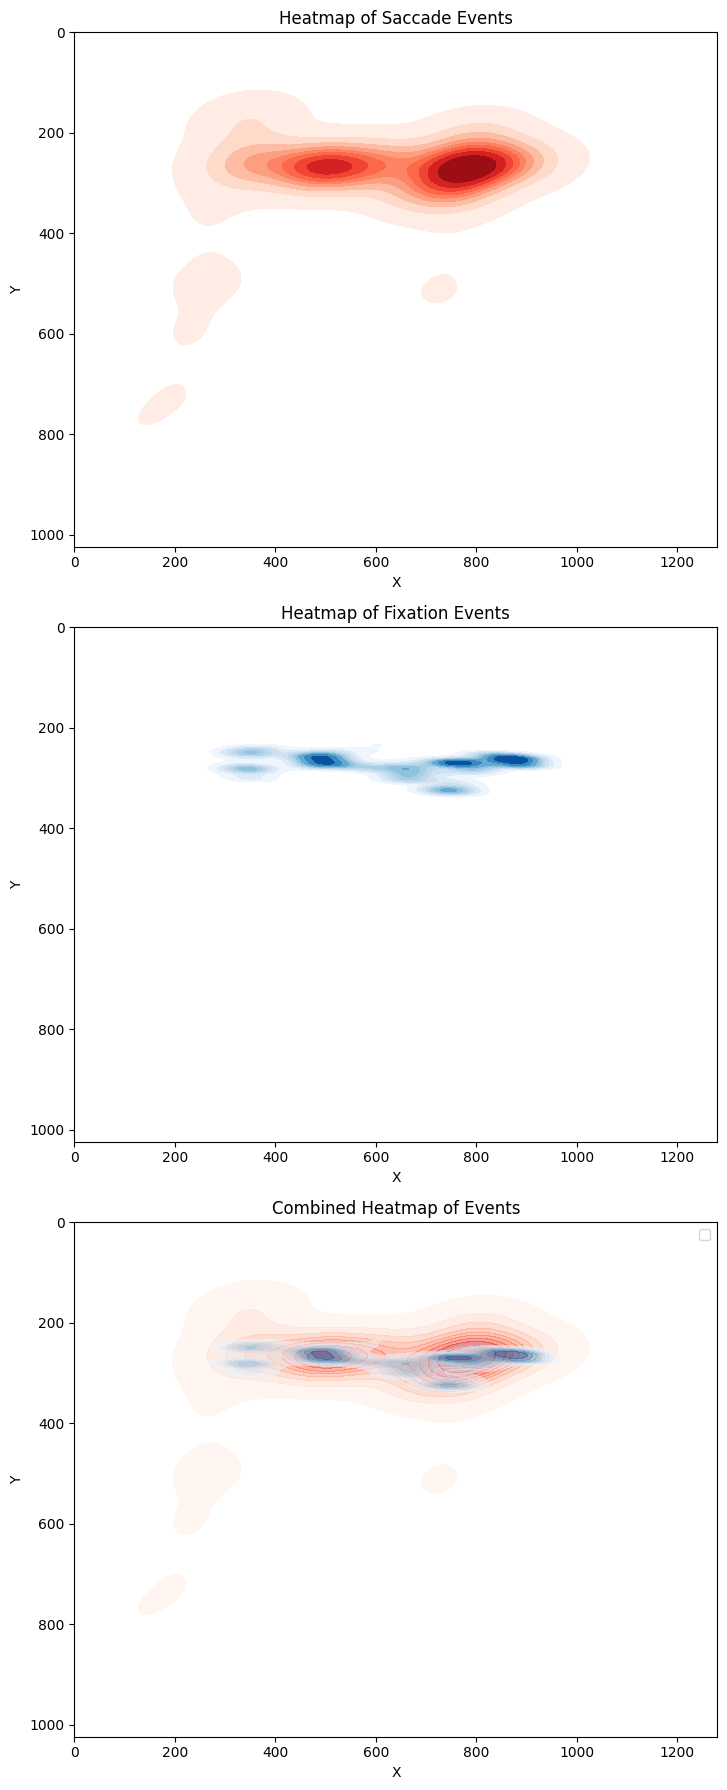

--------------------------------------------------
     Update     
--------------------------------------------------
       TimeStamp      X      Y     Event
0  12:30:19.9758  388.7  268.8  fixation
1  12:30:19.9763  387.0  269.1  fixation
2  12:30:19.9767  385.6  269.3  fixation
3  12:30:19.9772  385.6  269.5  fixation
4  12:30:19.9777  385.4  269.6  fixation


/var/folders/p7/7fx272ls7kg3097q8mnwp__80000gn/T/ipykernel_23244/3961197940.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


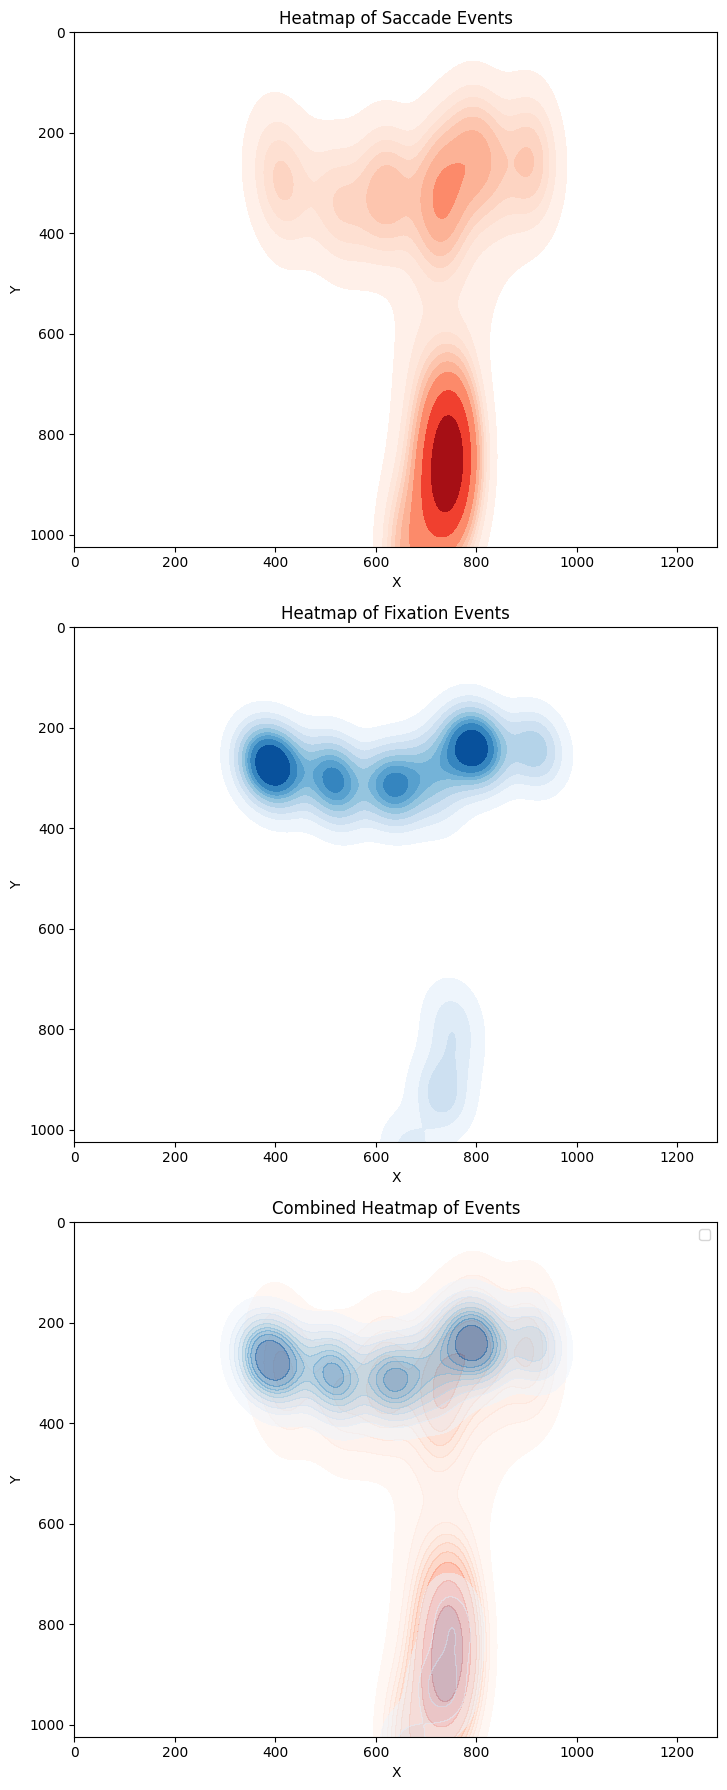

--------------------------------------------------


In [41]:
for category in ["Read", "See", "Translate", "Update"]:
    csv_path = f"../ufal_emmt/preprocessed-data/gaze/{category}/{CSV_FILE}"
    df = pd.read_csv(csv_path)
    print(f"     {category}     ")
    print("-" * 50)
    print(df.head())
    plot_gaze_heatmap(df)
    print("-" * 50)